In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

### Data import

In [2]:
df = pd.read_csv('../data/measurements.csv')

In [3]:
df2 = pd.read_excel('../data/measurements2.xlsx')

In [4]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


We merge both the csv and the excel provided and observe they are the same so proceed just with one df. 

### Data exploration and initial cleaning

In [6]:
df.shape #Initial data has 388 observations and 12 columns

(388, 12)

In [7]:
#Standarize column names
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [8]:
df.isna().sum() #There are some NaNs

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [9]:
df.dtypes #Many columns are "Object" when they should be numeric

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object

In [10]:
#Replacing , with . to ensure that to_numeric method works correctly
columns_to_modify = ['distance','consume','temp_inside','refill_liters']
df[columns_to_modify] = df[columns_to_modify].replace(',','.', regex = True) #we add parameter regex to ensure that it looks for the characters inside larger strings

In [11]:
df[columns_to_modify] = df[columns_to_modify].apply(pd.to_numeric, errors='coerce') #errors will be set to NaN

In [12]:
#Checking central measures of tendency to handle temp_inside NaNs
print(f"Mode: {df['temp_inside'].mode().values[0]}") #values[0] is added to just extract the first (and only) value from pandas series
print(f"Median: {df['temp_inside'].median()}")
print(f"Mean: {df['temp_inside'].mean()}")

Mode: 21.5
Median: 22.0
Mean: 21.929521276595743


Text(0, 0.5, 'Temperature inside')

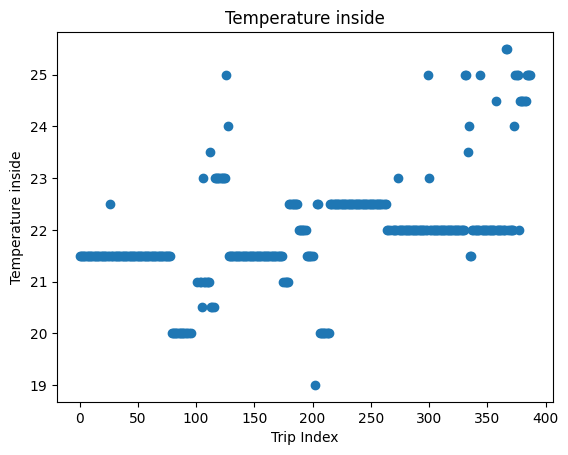

In [13]:
# Plot temperature inside
plt.scatter(df.index, df['temp_inside']);
plt.title('Temperature inside')
plt.xlabel('Trip Index')
plt.ylabel('Temperature inside')

In [14]:
# Data seems to have a few outliers that might affect the mean so we opt for filling NaNs with the mode or the median.
# We observe that median is higher than the mean so we opt to use the mode. 

#Replacing the 12 NaNs in the temp_inside column with the mode of the rest of the values
df['temp_inside'].fillna(round(df['temp_inside'].mode().values[0],1), inplace=True)

In [15]:
#Specials column data is represented in other columns so we drop it since we won't use it
df['specials'].value_counts()
df = df.drop(['specials'], axis=1)

In [16]:
#refill_liters and refill_gas have also a large number of NaNs so we will drop them also
df = df.drop(['refill_liters','refill_gas'], axis = 1)

#### Fuel consumed per trip and per hour

In [17]:
#Fuel consumed x trip = (consume (L/100km) * distance (km)/100)
df['fuel_per_trip'] = round(df['consume'] * df['distance']/100 , 3)

#Fuel consumed x hour =  (consume (L/100km) * distance (km)) / speed ( km/h).  Units will be L/h
df['fuel_per_hour'] = round(df['fuel_per_trip'] / df['speed'],4)

In [18]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_per_trip,fuel_per_hour
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.400,0.0538
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.504,0.0168
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.616,0.0162
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.503,0.0140
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.832,0.0181
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.592,0.0152
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.692,0.0182
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.608,0.0135
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.708,0.0169


#### Cost per trip 

In [19]:
#The idea was to find an API to get the gasoline prices in Barcelona. 
    #However, E10 doesn't seem to be an available combustible in the city gas stations.
    #Moreover, since we do not have a timestamp and prices can highly variate across stations and days,
        #results on cost comparison might not be reliable.
#Just to grasp an idea we will use kaggle prices to check the cost of each trip
    #(costs specified in the kaggle: E10 = 1.38€/L , SP98 = 1.46€/L)
    
#Consume units are L/100 km

def cost_per_trip(df):
    
    cost_E10 = 1.38
    cost_SP98 = 1.46

    df.loc[df['gas_type'] == 'E10', 'cost_trip'] = ((df['consume'] * df['distance']) / 100) * cost_E10
    df.loc[df['gas_type'] == 'SP98', 'cost_trip'] = ((df['consume'] * df['distance']) / 100) * cost_SP98
    
    return df

In [20]:
cost_per_trip(df)

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_per_trip,fuel_per_hour,cost_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.400,0.0538,1.932000
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.504,0.0168,0.695520
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.616,0.0162,0.850080
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.503,0.0140,0.694278
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.832,0.0181,1.148850
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.592,0.0152,0.864320
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.692,0.0182,1.010758
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.608,0.0135,0.887680
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.708,0.0169,1.034264


In [21]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,fuel_per_trip,fuel_per_hour,cost_trip
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.916237,11.358247,0.077320,0.123711,0.082474,0.935302,0.021244,1.332245
std,22.667837,1.033172,13.598524,0.997449,6.991542,0.267443,0.329677,0.275441,1.115959,0.015160,1.601124
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.120000,0.005500,0.165600
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.552000,0.013100,0.780550
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.681000,0.016300,0.964800
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.916500,0.025200,1.301350
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,11.453000,0.127300,16.721818


In [22]:
#Dividing the data between E10 and SP98 to compare

E10 = df[df['gas_type']=='E10']
SP98 = df[df['gas_type']=='SP98']

In [23]:
E10.shape

(160, 12)

In [24]:
SP98.shape #There are more trips with SP98

(228, 12)

In [25]:
E10.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,fuel_per_trip,fuel_per_hour,cost_trip
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,21.096250,4.931250,43.506250,21.909375,10.118750,0.043750,0.100000,0.075000,1.008919,0.022161,1.392327
std,20.307234,0.900956,14.077949,0.656060,6.392185,0.205181,0.300942,0.264218,0.956860,0.014124,1.320472
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000,0.120000,0.005500,0.165600
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000,0.576000,0.013200,0.795225
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000,0.693500,0.016450,0.957306
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000,1.042250,0.027725,1.438236
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000,5.994000,0.102900,8.271444


In [26]:
SP98.describe()
#Max distance is way larger with SP98, it will be good to check if that is a pattern. 
#Even though there are more trips fuel_per_trip, fuel_per_hour and therefore cost_trip means are with in SP98,
    #will this mean difference be significant?

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,fuel_per_trip,fuel_per_hour,cost_trip
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,18.639912,4.899123,40.820175,21.921053,12.228070,0.100877,0.140351,0.087719,0.883640,0.020600,1.290083
std,24.179598,1.118408,13.170122,1.180941,7.271373,0.301829,0.348115,0.283509,1.214638,0.015845,1.773384
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000,0.124000,0.005600,0.181040
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000,0.531000,0.012775,0.775260
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000,0.663000,0.016050,0.968272
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000,0.838000,0.024025,1.223334
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,11.453000,0.127300,16.721818


In [27]:
df.to_csv('../data/cleaned_data.csv')

### Data visualization

In [28]:
#Visualization of the data, plotting variables to check their behavior

In [29]:
#Creating a variable with only numeric columns
df_num  = df.select_dtypes(np.number)

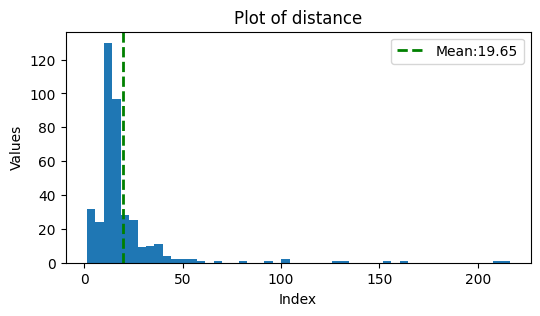

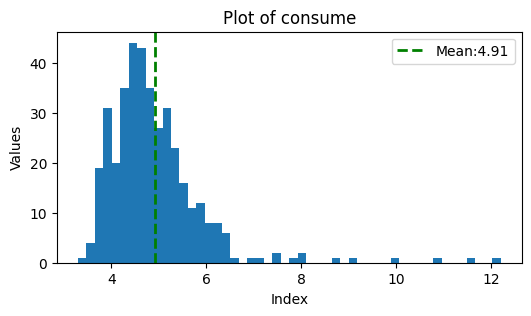

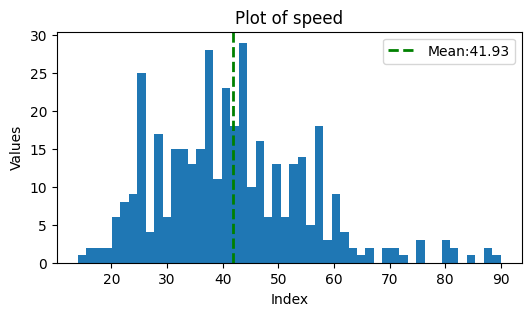

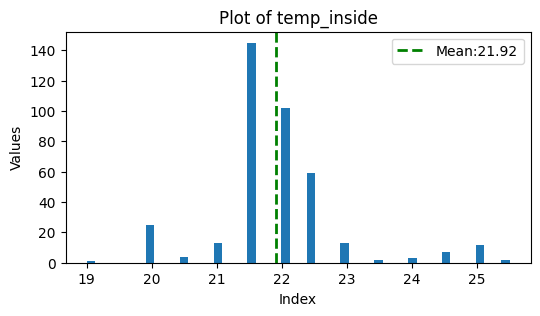

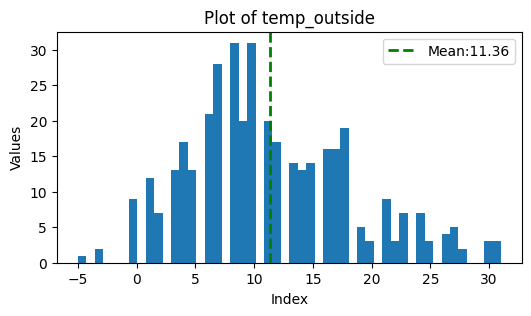

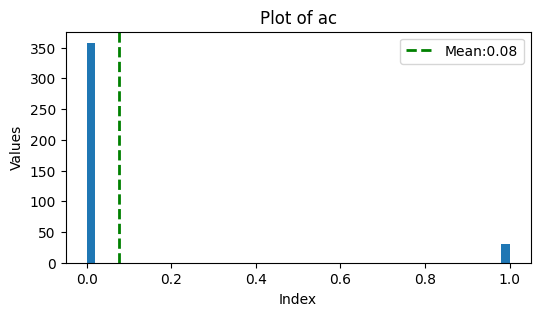

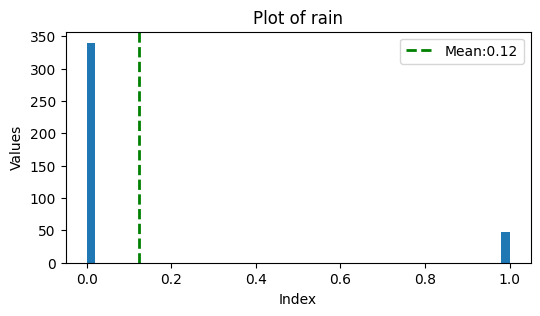

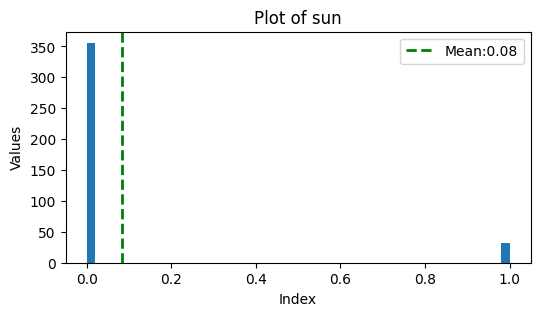

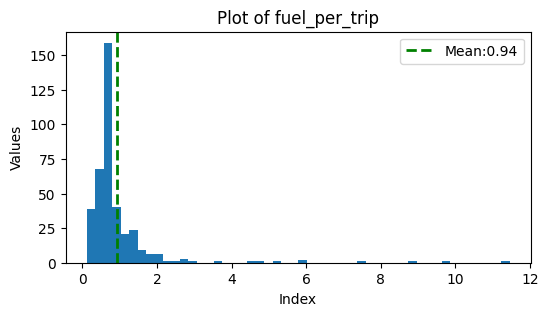

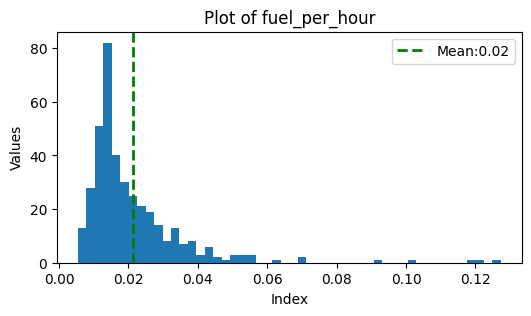

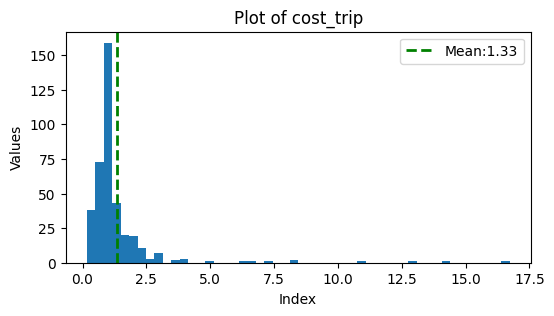

In [30]:
for column in df_num.columns:
    plt.figure(figsize=(6, 3))
    plt.hist(df_num[column], bins = 50)
    plt.title(f'Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    mean = df_num[column].mean()
    plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label= f'Mean:{mean:.2f}')
    plt.legend()
# We observe right skewed plots with some outliers of trips with larger distance and larger consume
# Also, it is corious to see rain / sun don't seem to be complementary since both have way more 0s than 1ns

Text(0, 0.5, 'Consume (L/ 100 km)')

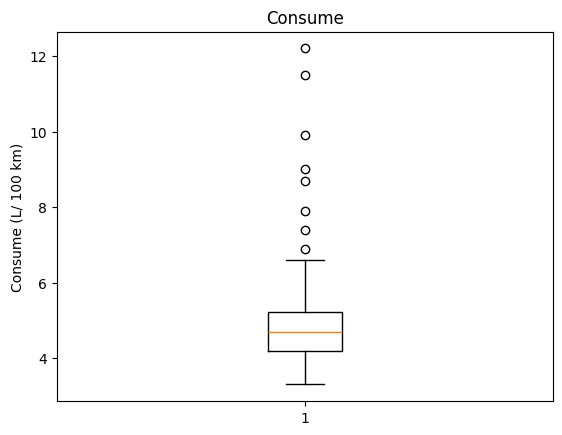

In [31]:
# Plot consume
plt.boxplot(SP98['consume'])
plt.title('Consume')
plt.ylabel('Consume (L/ 100 km)')

#We use a boxplot to check if the data has outliers.As expected do to the long right skweed graphs there are some large outliers

[Text(0.5, 1.0, 'SP98 distances')]

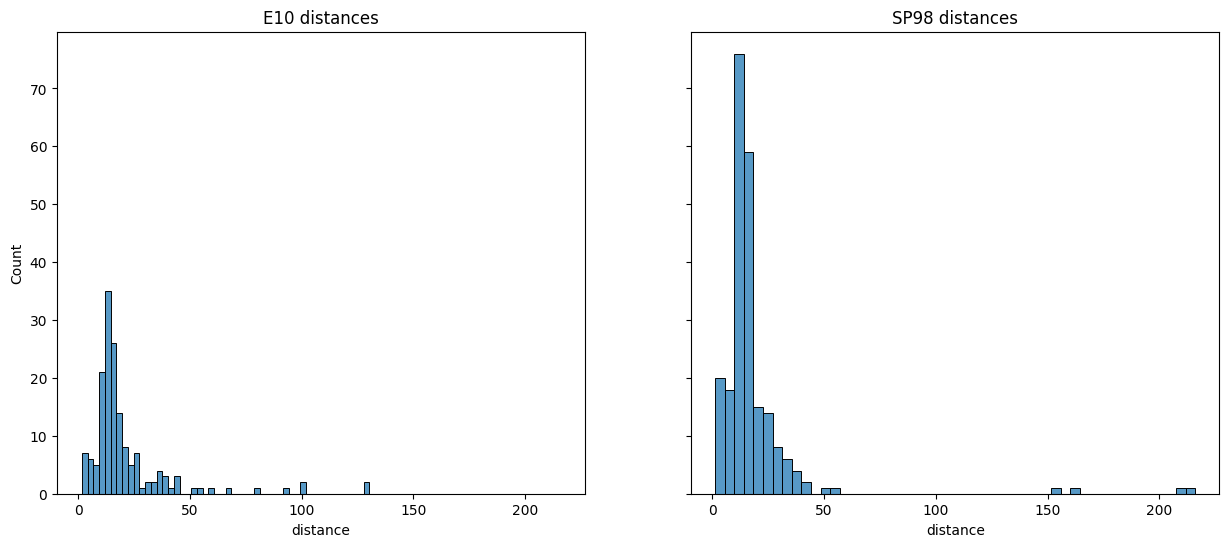

In [32]:
# Plot Distance of E10 vs SP98
fig,axes = plt.subplots(1,2,figsize=(15,6), sharey=True, sharex=True)
sns.histplot(ax=axes[0],data = E10, x=E10['distance'], bins = 50, label='E10').set(title = 'E10 distances')
sns.histplot(ax=axes[1],data = SP98, x=SP98['distance'], bins = 50, label='SP98').set(title = 'SP98 distances')

#SP98 is used for longer trips

<Axes: xlabel='speed', ylabel='fuel_per_hour'>

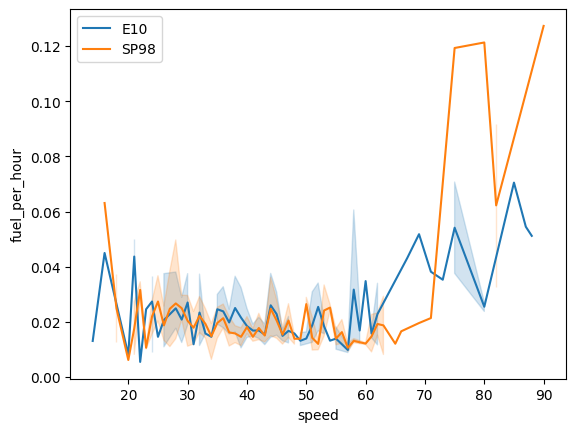

In [33]:
# Plot fuel_used of E10 vs SP98 based on speed
#fig,axes = plt.subplots(1,2,figsize=(15,6), sharey=True, sharex=True)
sns.lineplot(data = E10, x=E10['speed'], y=E10['fuel_per_hour'], label='E10')
sns.lineplot(data = SP98, x=SP98['speed'], y=SP98['fuel_per_hour'], label='SP98')

#After 70 km/h SP98 consumes more fuel per hour with a large difference

### Conclusions

- If we were to travel long distances at high speed E10 seems to be most cost-effective. However, if we take into account that the company operates in Barcelona which will usually be short distances inside the city it is not clear that the cost will be lower.
